In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [15]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [8]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [16]:
train.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)
test.drop(['PassengerId','Name','Cabin','Ticket'],axis=1,inplace=True)

In [17]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [18]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000136B83456C8>,
      dtype=object)

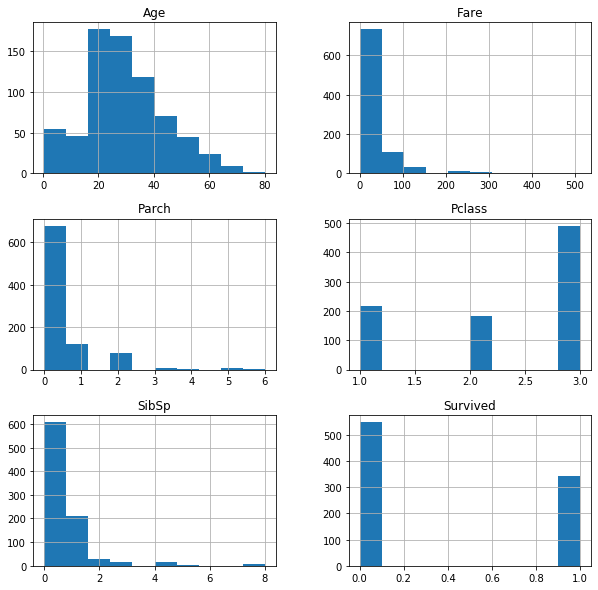

In [20]:
train.hist(figsize=(10,10))

C:\Users\manoj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\manoj\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


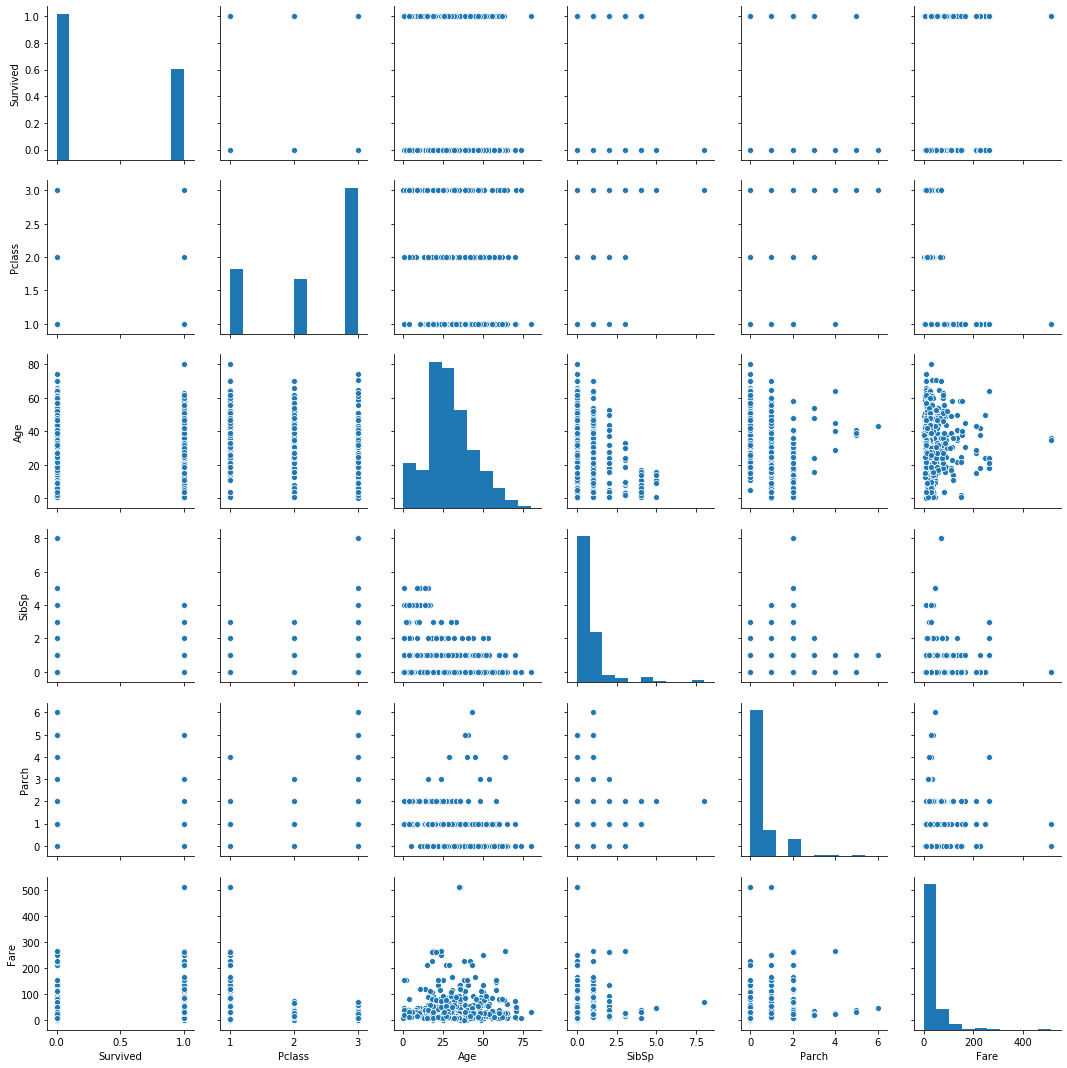

In [23]:
sns.pairplot(train)

In [27]:
from sklearn.impute import SimpleImputer

In [32]:
impute=SimpleImputer(strategy='median')

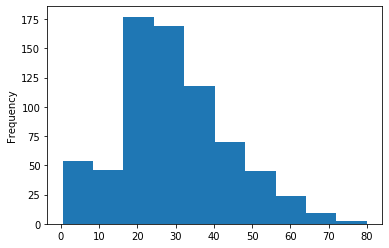

In [31]:
train.Age.plot(kind='hist')

In [34]:
impute.fit(train[['Age']])

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [37]:
train['Age']=impute.transform(train[['Age']])

In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


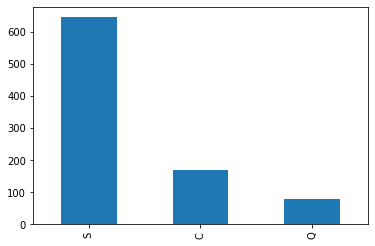

In [55]:
train.Embarked.value_counts().plot(kind='bar')

In [53]:
train.loc[train.Embarked.isna(),'Embarked']='S'

In [54]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [56]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         332 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [58]:
test['Age']=impute.transform(test[['Age']])

In [59]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        417 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [60]:
train.Fare.mean()

32.2042079685746

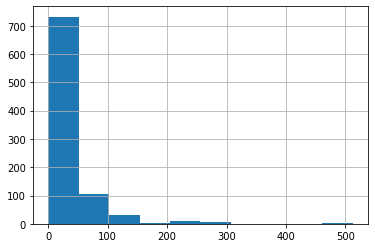

In [61]:
train.Fare.hist()

In [64]:
test.Fare=test.Fare.fillna(value=32.2)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB


In [66]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
Pclass      418 non-null int64
Sex         418 non-null object
Age         418 non-null float64
SibSp       418 non-null int64
Parch       418 non-null int64
Fare        418 non-null float64
Embarked    418 non-null object
dtypes: float64(2), int64(3), object(2)
memory usage: 23.0+ KB


In [67]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [84]:
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,add_dummy_feature

In [89]:
ord=OrdinalEncoder().fit(train.Sex.values.reshape(-1,1))

In [99]:
test.Sex=ord.transform(test.Sex.values.reshape(-1,1))

In [100]:
train.Sex=ord.transform(train.Sex.values.reshape(-1,1))

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null float64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(3), int64(4), object(1)
memory usage: 55.8+ KB


In [102]:
from sklearn.preprocessing import OneHotEncoder

In [103]:
ohe=OneHotEncoder()

In [105]:
ohe.fit(train.Embarked.values.reshape(-1,1))

OneHotEncoder(categorical_features=None, categories=None, drop=None,
              dtype=<class 'numpy.float64'>, handle_unknown='error',
              n_values=None, sparse=True)

In [113]:
train=train.join(pd.DataFrame(ohe.transform(train.Embarked.values.reshape(-1,1)).toarray()))

In [114]:
test=test.join(pd.DataFrame(ohe.transform(test.Embarked.values.reshape(-1,1)).toarray()))

In [120]:
test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,3,1.0,34.5,0,0,7.8292,Q,0.0,1.0,0.0
1,3,0.0,47.0,1,0,7.0000,S,0.0,0.0,1.0
2,2,1.0,62.0,0,0,9.6875,Q,0.0,1.0,0.0
3,3,1.0,27.0,0,0,8.6625,S,0.0,0.0,1.0
4,3,0.0,22.0,1,1,12.2875,S,0.0,0.0,1.0


In [121]:
test.rename(columns={0:'C',1:'Q',2:'S'},inplace=True)

In [118]:
test.columns

Index(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked', 0, 1, 2], dtype='object')

In [123]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,0,1,2
0,0,3,1.0,22.0,1,0,7.2500,S,0.0,0.0,1.0
1,1,1,0.0,38.0,1,0,71.2833,C,1.0,0.0,0.0
2,1,3,0.0,26.0,0,0,7.9250,S,0.0,0.0,1.0
3,1,1,0.0,35.0,1,0,53.1000,S,0.0,0.0,1.0
4,0,3,1.0,35.0,0,0,8.0500,S,0.0,0.0,1.0


In [124]:
train.rename(columns={0:'C',1:'Q',2:'S'},inplace=True)

In [126]:
train.drop('Embarked',axis=1,inplace=True)

In [127]:
test.drop('Embarked',axis=1,inplace=True)

In [128]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null float64
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Fare        891 non-null float64
C           891 non-null float64
Q           891 non-null float64
S           891 non-null float64
dtypes: float64(6), int64(4)
memory usage: 69.7 KB


In [129]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
Pclass    418 non-null int64
Sex       418 non-null float64
Age       418 non-null float64
SibSp     418 non-null int64
Parch     418 non-null int64
Fare      418 non-null float64
C         418 non-null float64
Q         418 non-null float64
S         418 non-null float64
dtypes: float64(6), int64(3)
memory usage: 29.5 KB


In [133]:
train.corr()['Survived'].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
C           0.168240
Parch       0.081629
Q           0.003650
SibSp      -0.035322
Age        -0.064910
S          -0.149683
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [141]:
from sklearn.model_selection import train_test_split

In [142]:
xtr,xval=train_test_split(train,test_size=0.25,random_state=42)

In [151]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,f1_score,precision_recall_curve
from sklearn.model_selection import cross_val_score,cross_val_predict,GridSearchCV

In [177]:
from sklearn.linear_model import LogisticRegression

log_clf=LogisticRegression()

log_clf.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [150]:
pred=log_clf.predict(xtr.iloc[:,1:])

accuracy_score(xtr.iloc[:,0],pred)

0.8038922155688623

In [149]:
pred=log_clf.predict(xval.iloc[:,1:])

accuracy_score(xval.iloc[:,0],pred)

0.7982062780269058

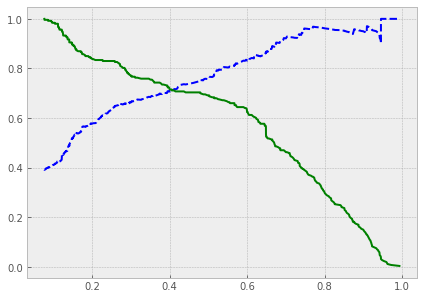

In [197]:
p,r,t=precision_recall_curve(xtr.iloc[:,0],log_clf.predict_proba(xtr.iloc[:,1:])[:,1])

plt.figure(figsize=(7,5))
plt.style.use('bmh')
plt.plot(t,p[:-1],'b--')
plt.plot(t,r[:-1],'g-')

In [178]:
from sklearn.ensemble import RandomForestClassifier

In [184]:
f_clf=RandomForestClassifier(n_estimators=20,max_depth=3,random_state=42)
f_clf.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=3, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=20,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [185]:
pred=f_clf.predict(xtr.iloc[:,1:])

accuracy_score(xtr.iloc[:,0],pred)

0.8383233532934131

In [187]:
pred=f_clf.predict(xval.iloc[:,1:])

accuracy_score(xval.iloc[:,0],pred)

0.820627802690583

In [194]:
f_clf.predict_proba(xtr.iloc[:,1:])[:,1]

array([0.26340679, 0.15293173, 0.77952896, 0.15293173, 0.57652381,
       0.80069999, 0.48253928, 0.18861311, 0.84326783, 0.17936723,
       0.57619441, 0.15293173, 0.48253928, 0.88962183, 0.48253928,
       0.86406189, 0.23255347, 0.17401252, 0.82250008, 0.21076994,
       0.48253928, 0.21779295, 0.15293173, 0.15293173, 0.15293173,
       0.15293173, 0.26340679, 0.56459303, 0.23274733, 0.17936723,
       0.21076994, 0.35741333, 0.17401252, 0.15293173, 0.87981922,
       0.18861311, 0.81349974, 0.82288682, 0.43047098, 0.83230269,
       0.15293173, 0.21282275, 0.25361658, 0.15293173, 0.25361658,
       0.53597804, 0.15293173, 0.57984526, 0.22052336, 0.21974733,
       0.34283002, 0.81238104, 0.15293173, 0.15293173, 0.27322119,
       0.92184558, 0.18861311, 0.15293173, 0.15293173, 0.84353939,
       0.15154106, 0.27322119, 0.25717946, 0.52223043, 0.19466131,
       0.58774772, 0.44011737, 0.15293173, 0.16530945, 0.62989397,
       0.53983191, 0.15293173, 0.26340679, 0.17916418, 0.30600

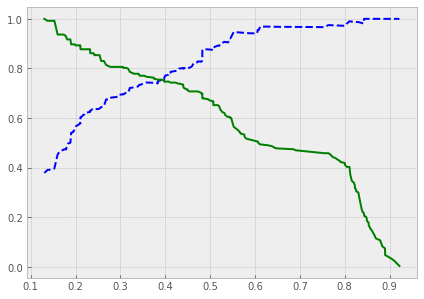

In [196]:
p,r,t=precision_recall_curve(xtr.iloc[:,0],f_clf.predict_proba(xtr.iloc[:,1:])[:,1])

plt.figure(figsize=(7,5))
plt.style.use('bmh')
plt.plot(t,p[:-1],'b--')
plt.plot(t,r[:-1],'g-')

In [204]:
from sklearn.svm import SVC

In [205]:
sclf=SVC()

In [207]:
from sklearn.ensemble import VotingClassifier

In [208]:
vclf=VotingClassifier([('logreg',log_clf),('rforest',f_clf),('svc',sclf)])

In [209]:
vclf.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


VotingClassifier(estimators=[('logreg',
                              LogisticRegression(C=1.0, class_weight=None,
                                                 dual=False, fit_intercept=True,
                                                 intercept_scaling=1,
                                                 l1_ratio=None, max_iter=100,
                                                 multi_class='warn',
                                                 n_jobs=None, penalty='l2',
                                                 random_state=None,
                                                 solver='warn', tol=0.0001,
                                                 verbose=0, warm_start=False)),
                             ('rforest',
                              RandomForestClassifier(bootstrap=True,
                                                     class_weight=None,
                                                     criterio...
                                        

In [210]:
pred=vclf.predict(xtr.iloc[:,1:])

accuracy_score(xtr.iloc[:,0],pred)

0.8473053892215568

In [212]:
pred=vclf.predict(xval.iloc[:,1:])

accuracy_score(xval.iloc[:,0],pred)

0.8161434977578476

In [213]:
from sklearn.ensemble import BaggingClassifier

In [217]:
for_clf=RandomForestClassifier()

In [218]:
params=[{'max_depth':[3,4,5,6],'max_features':[3,4,5,6],'n_estimators':[10,20,30,40,50,100]}]

In [219]:
g=GridSearchCV(for_clf,params,n_jobs=-1)

In [223]:
g.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

C:\Users\manoj\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
           

In [230]:
len(g.cv_results_['params'])

96

In [231]:
g.best_params_

{'max_depth': 5, 'max_features': 5, 'n_estimators': 10}

In [233]:
best_clf=g.best_estimator_

In [323]:
best_clf.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=5, max_features=5, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [324]:
best_clf.feature_importances_

array([0.10952473, 0.47957693, 0.12624725, 0.04951408, 0.02554489,
       0.18423007, 0.00495282, 0.00822766, 0.01218157])

In [321]:
pred=best_clf.predict(xtr.iloc[:,1:])

accuracy_score(xtr.iloc[:,0],pred)

0.875748502994012

In [322]:
pred=best_clf.predict(xval.iloc[:,1:])

accuracy_score(xval.iloc[:,0],pred)

0.7982062780269058

In [273]:
bag_clf=BaggingClassifier(best_clf,n_estimators=20,n_jobs=-1,bootstrap=False)

In [274]:
bag_clf.fit(xtr.iloc[:,1:],xtr.iloc[:,0])

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                

In [275]:
pred=bag_clf.predict(xtr.iloc[:,1:])

print(accuracy_score(xtr.iloc[:,0],pred),precision_score(xtr.iloc[:,0],pred),recall_score(xtr.iloc[:,0],pred))

0.8652694610778443 0.893719806763285 0.7312252964426877


In [276]:
pred=bag_clf.predict(xval.iloc[:,1:])

print(accuracy_score(xval.iloc[:,0],pred),precision_score(xval.iloc[:,0],pred),recall_score(xval.iloc[:,0],pred))

0.820627802690583 0.8356164383561644 0.6853932584269663


In [280]:
cross_val_score(bag_clf,xtr.iloc[:,1:],xtr.iloc[:,0],cv=10)

array([0.83823529, 0.75      , 0.86764706, 0.88059701, 0.82089552,
       0.78787879, 0.8030303 , 0.77272727, 0.78787879, 0.90909091])

In [282]:
bag_clf

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                

In [304]:
final_clf=BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                                                        oob_score=False,
                                                        random_state=None,
                                                        verbose=0,
                                                        warm_start=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=-1, oob_score=False,
                  random_state=None, verbose=0, warm_start=False)

In [305]:
final_clf.fit(train.iloc[:,1:],train.iloc[:,0])

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                

In [306]:
np.mean(cross_val_score(final_clf,train.iloc[:,1:],train.iloc[:,0],cv=5))

0.8182140707791049

In [308]:
test_pred=final_clf.predict(test)

In [310]:
pd.read_csv('gender_submission.csv')

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [317]:
result=pd.DataFrame(pd.read_csv('test.csv')['PassengerId']).join(pd.DataFrame(test_pred,columns=['Survived']))

In [318]:
result.shape

(418, 2)

In [319]:
result.to_csv('submission.csv',index=False)

In [320]:
bag_clf

BaggingClassifier(base_estimator=RandomForestClassifier(bootstrap=True,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=5,
                                                        max_features=5,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        n_estimators=10,
                                                        n_jobs=None,
                

In [327]:
train.select_dtypes('int64')

,Survived,Pclass,SibSp,Parch
0,0,3,1,0
1,1,1,1,0
2,1,3,0,0
3,1,1,1,0
4,0,3,0,0
...,...,...,...,...
886,0,2,0,0
887,1,1,0,0
888,0,3,1,2
889,1,1,0,0
